# Analyzing Fandango Movie Ratings

It was revealed previously that Fandango was artificially increasing the ratings of movies displayed on their website. After being exposed, they claimed to be correcting this 'bug' as soon as possible. The goal of this project is to verify if Fandango has indeed fixed their rating inflation practices. 

In [1]:
import pandas as pd
score_comparison = pd.read_csv('fandango_score_comparison.csv')
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
comparison = score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [3]:
ratings = ratings_16_17[['movie', 'year', 'fandango']]

In [4]:
comparison.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


These two samples currently have an issue. We cannot complete our initial goal by comparing different movies released in different years. Because of this, a pivot is being made to inspect 'popular' movies from 2015 vs. popular movies from 2016. Popular is defined by having 30 or more fandango fan votes, or movies having a fandango rating of 3 stars or more.

In [6]:
fifteen = comparison[comparison['FILM'].str.contains('2015') ]

In [7]:
sixteen = ratings[ratings['year'] == 2016]
sixteen = sixteen[sixteen['fandango'] >= 3.0]

In [8]:
print(fifteen.info())
print(sixteen.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  129 non-null    object 
 1   Fandango_Stars        129 non-null    float64
 2   Fandango_Ratingvalue  129 non-null    float64
 3   Fandango_votes        129 non-null    int64  
 4   Fandango_Difference   129 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     185 non-null    object 
 1   year      185 non-null    int64  
 2   fandango  185 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB
None


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

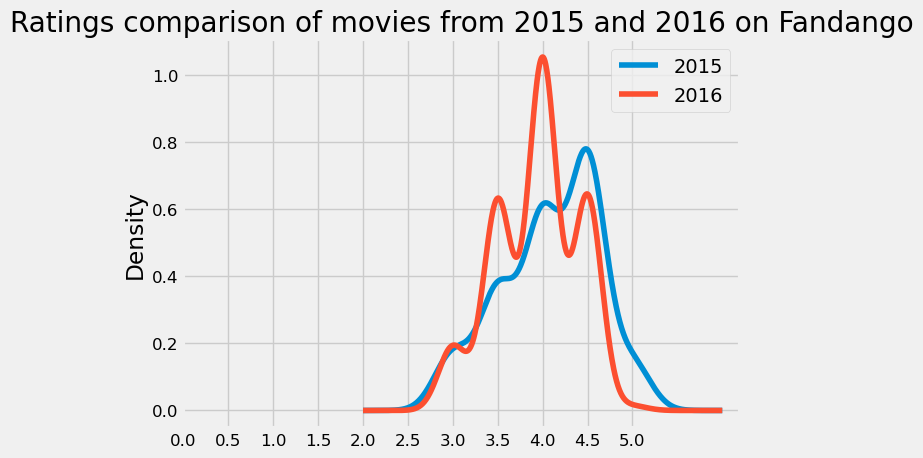

In [10]:
plt.style.use('fivethirtyeight')
fifteen['Fandango_Stars'].plot.kde(label='2015', legend=True, 
                                   xticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 
                                   
                                  )
sixteen['fandango'].plot.kde(label='2016', legend=True, 
                             xticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 
                             title='Ratings comparison of movies from 2015 and 2016 on Fandango', fontsize=12, ylabel = 'Stars'
                            )
plt.show()

There seems to be a few main differenes in the ratings from 2015 and 2016. The ratings from 2015 show a heavy left skew, with ratings increasing as 4.5 stars is approached. In contrast, 2016 shows almost a normal distribution around 4.0 stars, with local peaks at 3.5 and 4.5. These peaks can be attributed to the half-number nature of the data, where numbers can only exist in intervals of 0.5. It appears that movies from 2016 are generally rated lower than movies from 2015. The graph suggests that Fandango did make a change in their ratings, but it is unclear if this change is still somewhat fabricated.

In [11]:
fifteen_fq = fifteen['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
sixteen_fq = sixteen['fandango'].value_counts(normalize=True).sort_index()*100

In [12]:
print(fifteen_fq)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [13]:
print(sixteen_fq)

3.0     7.567568
3.5    24.864865
4.0    41.621622
4.5    25.405405
5.0     0.540541
Name: fandango, dtype: float64


Even just looking at the frequency tables the difference is clear that movies from 2015 are rated better than movies from 2016. Although, this is easier to grasp in the density plot above. 

In [52]:
fif_mean = fifteen['Fandango_Stars'].mean()
fif_median = fifteen['Fandango_Stars'].median()
fif_mode = fifteen['Fandango_Stars'].mode()[0]

six_mean = sixteen['fandango'].mean()
six_median = sixteen['fandango'].median()
six_mode = sixteen['fandango'].mode()[0]

In [53]:
print(fif_mean, six_mean, fif_median, six_median, fif_mode, six_mode)

4.0852713178294575 3.9324324324324325 4.0 4.0 4.5 4.0


In [54]:
combined = pd.DataFrame(data=({'2015': [fif_mean, fif_median, fif_mode], 
                               '2016': [six_median, six_median, six_mode], 
                              }))
combined.index = ['mean','median','mode']
combined

,2015,2016
mean,4.085271,4.0
median,4.000000,4.0
mode,4.500000,4.0


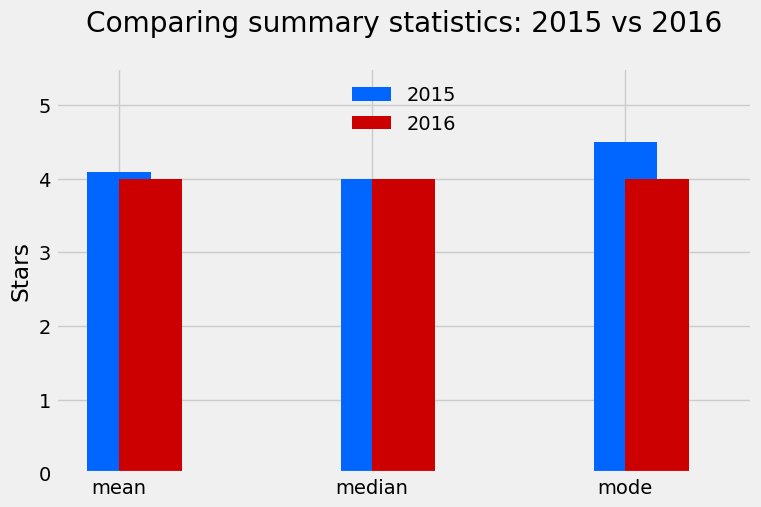

In [56]:
plt.style.use('fivethirtyeight')
combined['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
combined['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)

plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Summary

These are a few next steps to consider:

1. Customize your graphs more by reproducing almost completely the FiveThirtyEight style. You can take a look at this tutorial if you want to do that.
2. Improve your project from a stylistical point of view by following the guidelines discussed in this style guide.
3. Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches you can take here — you can take some inspiration from this article.
4. Collect recent movie ratings data and formulate your own research questions. You can take a look at this blog post to learn how to scrape movie ratings for IMDB and Metacritic.